In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1 生成数据集并展示

In [2]:
n_train, n_test, num_inputs = 7000, 3000, 500
true_w, true_b = torch.ones(num_inputs, 1) * 0.0056, 0.028

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 2 读取数据

In [3]:
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,  num_workers=0)

In [4]:
for X, y in train_iter:
    print(X, y)
    break

tensor([[ 1.4816,  0.2678,  0.0978,  ...,  0.1755,  0.6612,  1.2892],
        [-0.6955, -1.3335,  0.2349,  ...,  0.6259,  0.0772,  0.3371],
        [ 0.0909, -0.8245, -0.3800,  ..., -0.2389,  0.1990,  0.1081],
        ...,
        [-0.1767, -2.2641,  0.5047,  ..., -1.4737,  0.7849,  1.0674],
        [-0.9752,  0.9799, -1.6096,  ...,  0.8725,  0.1462,  0.2498],
        [ 0.2135, -1.3644,  0.4100,  ..., -0.9637,  1.0234,  1.2979]]) tensor([[-0.0653],
        [-0.0253],
        [-0.2762],
        [ 0.0198],
        [ 0.0752],
        [ 0.0174],
        [ 0.1699],
        [-0.0299],
        [ 0.0746],
        [-0.1622],
        [ 0.3070],
        [-0.0405],
        [-0.0673],
        [ 0.0192],
        [ 0.0952],
        [ 0.2526],
        [-0.0279],
        [ 0.0853],
        [ 0.0054],
        [ 0.1104],
        [-0.0305],
        [ 0.1331],
        [ 0.0460],
        [ 0.0353],
        [ 0.2120],
        [ 0.1395],
        [ 0.0968],
        [-0.1808],
        [-0.0652],
        [ 0.134

## 3 初始化模型参数

In [5]:
num_inputs, num_outputs = 500, 1

w = torch.randn((num_inputs, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
params = [w, b]

## 4 定义模型

In [6]:
def net(X):
    return torch.mm(X, w) + b

## 5 定义损失函数

In [7]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 6 定义优化算法

In [8]:
def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad

## 7 定义loss画图函数

In [9]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

## 8 训练模型

In [10]:
def train(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            # 反向传播 + 更新优化参数
            l.backward()
            if optimizer == None:
                SGD(params, lr)
            else:
                optimizer.step()
            
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
        print(train_ls[-1], test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w', w.norm().item())

0.3238992393016815 0.31797364354133606
0.0007349473889917135 0.0007859660545364022
0.0002813776081893593 0.00029279309092089534
0.00025436264695599675 0.0002483701391611248
0.0002765580720733851 0.0002853501355275512
L2 norm of w 0.1280234307050705


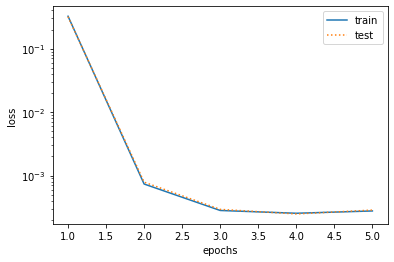

In [11]:
num_epochs = 5
lr = 0.003
train(net, train_iter, test_iter, squared_loss, num_epochs, batch_size, params, lr)